# **Реализовать и протестировать для русского языка HMM теггер**

In [ ]:
!pip install numpy
!pip install lxml
!pip install bs4
!pip install nltk
!pip install pandas
!pip install sklearn

In [ ]:
import nltk, re, pprint
import numpy as np
from bs4 import BeautifulSoup as bs
import lxml
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [ ]:
list_tagged = []

with open("/content/annot.opcorpora.no_ambig_strict.xml", "r") as file:
    list_tagged = file.readlines()

list_tagged = "".join(list_tagged)
list_tagged = bs(list_tagged, "lxml")


In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(list_tagged)

/usr/local/lib/python3.9/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [ ]:
paragpahs = soup.find_all('paragraph')

In [ ]:
sentences = [paragrapg.find_all('sentence') for paragrapg in paragpahs]

In [ ]:
tokens = []
for sent in sentences:
  for s in sent:
    tokens.append(s.find_all('tokens'))

In [ ]:
wordbank = []
for sent in tokens:
  c_tokens = sent[0].find_all('token')
  c_sent = []
  for token in c_tokens:
    text = token['text']
    pos = token.find('g')['v']
    c_sent.append((text, pos))
  wordbank.append(c_sent)

In [ ]:
wordbank[:10]

[[('«', 'PNCT'),
  ('Школа', 'NOUN'),
  ('злословия', 'NOUN'),
  ('»', 'PNCT'),
  ('учит', 'VERB'),
  ('прикусить', 'INFN'),
  ('язык', 'NOUN')],
 [('Сохранится', 'VERB'),
  ('ли', 'PRCL'),
  ('градус', 'NOUN'),
  ('дискуссии', 'NOUN'),
  ('в', 'PREP'),
  ('новом', 'ADJF'),
  ('сезоне', 'NOUN'),
  ('?', 'PNCT')],
 [('Великолепная', 'ADJF'),
  ('«', 'PNCT'),
  ('Школа', 'NOUN'),
  ('злословия', 'NOUN'),
  ('»', 'PNCT'),
  ('вернулась', 'VERB'),
  ('в', 'PREP'),
  ('эфир', 'NOUN'),
  ('после', 'PREP'),
  ('летних', 'ADJF'),
  ('каникул', 'NOUN'),
  ('в', 'PREP'),
  ('новом', 'ADJF'),
  ('формате', 'NOUN'),
  ('.', 'PNCT')],
 [('Потом', 'ADVB'),
  ('проект', 'NOUN'),
  ('переехал', 'VERB'),
  ('с', 'PREP'),
  ('«', 'PNCT'),
  ('Культуры', 'NOUN'),
  ('»', 'PNCT'),
  ('на', 'PREP'),
  ('НТВ', 'NOUN'),
  ('.', 'PNCT')],
 [('Это', 'NPRO'),
  ('помимо', 'PREP'),
  ('явных', 'ADJF'),
  ('перемен', 'NOUN'),
  ('в', 'PREP'),
  ('виде', 'NOUN'),
  ('тут', 'ADVB'),
  ('же', 'PRCL'),
  ('появившихс

In [ ]:
list_tagged = wordbank

In [ ]:
random.seed(1234)
train_set, test_set = train_test_split(list_tagged, test_size=0.3)

print(len(train_set))
print(len(test_set))
print(train_set[:5])

8078
3462
[[('«', 'PNCT'), ('Я', 'NPRO'), ('очень', 'ADVB'), ('по', 'PREP'), ('отцу', 'NOUN'), ('тосковал', 'VERB'), (',', 'PNCT'), ('даже', 'PRCL'), ('плакал', 'VERB'), ('потихоньку', 'ADVB'), ('.', 'PNCT')], [('Демография', 'NOUN')], [('Всем', 'ADJF'), ('миром', 'NOUN')], [('Стивен', 'NOUN'), ('Хант', 'NOUN'), ('отчасти', 'ADVB'), ('поддерживает', 'VERB'), ('эту', 'ADJF'), ('позицию', 'NOUN'), (',', 'PNCT'), ('отчасти', 'ADVB'), ('оппонирует', 'VERB'), ('своим', 'ADJF'), ('коллегам', 'NOUN'), ('по', 'PREP'), ('цеху', 'NOUN'), ('.', 'PNCT')], [('Впервые', 'ADVB'), ('за', 'PREP'), ('последние', 'ADJF'), ('годы', 'NOUN'), ('в', 'PREP'), ('стране', 'NOUN'), (',', 'PNCT'), ('которая', 'ADJF'), ('является', 'VERB'), ('образцом', 'NOUN'), ('соблюдения', 'NOUN'), ('гражданских', 'ADJF'), ('свобод', 'NOUN'), (',', 'PNCT'), ('журналисты', 'NOUN'), ('должны', 'ADJS'), ('были', 'VERB'), ('обратиться', 'INFN'), ('к', 'PREP'), ('полицейской', 'ADJF'), ('защите', 'NOUN'), ('от', 'PREP'), ('угроз', 

In [ ]:
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

53751

In [ ]:
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['«',
 'Я',
 'очень',
 'по',
 'отцу',
 'тосковал',
 ',',
 'даже',
 'плакал',
 'потихоньку']

In [ ]:
V = set(tokens)
print(len(V))

T = set([pair[1] for pair in train_tagged_words])
print(len(T))

print(T)

18065
26
{'SYMB', 'GRND', 'PNCT', 'COMP', 'CONJ', 'PRTS', 'NOUN', 'VERB', 'LATN', 'ADJS', 'INTJ', 'NUMR', 'TIME', 'ADJF', 'GREK', 'ROMN', 'PRCL', 'PRED', 'PRTF', 'NPRO', 'HANI', 'INFN', 'NUMB', 'DATE', 'ADVB', 'PREP'}


P(w/t)

In [ ]:
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [ ]:
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)

    return (count_w_given_tag, count_tag)

In [ ]:
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [ ]:
tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)):
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [ ]:
tags_matrix

array([[5.36912754e-02, 0.00000000e+00, 1.74496651e-01, 0.00000000e+00,
        6.71140943e-03, 0.00000000e+00, 8.05369094e-02, 6.71140943e-03,
        2.68456370e-01, 0.00000000e+00, 6.71140943e-03, 0.00000000e+00,
        0.00000000e+00, 2.01342274e-02, 6.71140924e-02, 0.00000000e+00,
        6.71140943e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.81879187e-01, 0.00000000e+00,
        6.71140943e-03, 2.01342274e-02],
       [0.00000000e+00, 0.00000000e+00, 1.42857149e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.19327742e-01, 8.40336177e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.24369767e-02, 0.00000000e+00, 0.00000000e+00,
        8.40336177e-03, 0.00000000e+00, 0.00000000e+00, 8.40336177e-03,
        0.00000000e+00, 5.88235296e-02, 1.68067235e-02, 0.00000000e+00,
        1.68067235e-02, 3.27731103e-01],
       [3.57625377e-03, 7.07303500e-03, 1.65858701e-01

In [ ]:
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))

In [ ]:
tags_df

,SYMB,GRND,PNCT,COMP,CONJ,PRTS,NOUN,VERB,LATN,ADJS,...,PRCL,PRED,PRTF,NPRO,HANI,INFN,NUMB,DATE,ADVB,PREP
SYMB,0.053691,0.000000,0.174497,0.000000,0.006711,0.000000,0.080537,0.006711,0.268456,0.000000,...,0.006711,0.000000,0.000000,0.000000,0.000000,0.000000,0.281879,0.000000,0.006711,0.020134
GRND,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.319328,0.008403,0.000000,0.000000,...,0.008403,0.000000,0.000000,0.008403,0.000000,0.058824,0.016807,0.000000,0.016807,0.327731
PNCT,0.003576,0.007073,0.165859,0.002702,0.041564,0.004768,0.265040,0.095287,0.043710,0.003338,...,0.022332,0.002543,0.008186,0.048160,0.002782,0.008901,0.051021,0.000159,0.040213,0.085910
COMP,0.000000,0.024000,0.448000,0.000000,0.016000,0.000000,0.096000,0.120000,0.008000,0.000000,...,0.016000,0.008000,0.000000,0.024000,0.000000,0.024000,0.008000,0.000000,0.008000,0.080000
CONJ,0.000988,0.000988,0.178854,0.009881,0.014822,0.003953,0.227273,0.103755,0.010870,0.006917,...,0.049407,0.005929,0.003953,0.068182,0.000000,0.026680,0.007905,0.000000,0.069170,0.075099
PRTS,0.000000,0.000000,0.145553,0.000000,0.021563,0.000000,0.229111,0.000000,0.000000,0.000000,...,0.016173,0.000000,0.005391,0.000000,0.000000,0.021563,0.088949,0.000000,0.021563,0.339623
NOUN,0.000984,0.000492,0.366605,0.001107,0.018389,0.004982,0.216605,0.100984,0.013776,0.004920,...,0.017036,0.003014,0.002091,0.010947,0.000000,0.006519,0.035609,0.000000,0.016359,0.113838
VERB,0.000000,0.000217,0.235894,0.005208,0.008464,0.033420,0.248264,0.000217,0.007378,0.008030,...,0.019531,0.000000,0.001953,0.043837,0.000000,0.082682,0.021701,0.000000,0.035807,0.159505
LATN,0.033854,0.000000,0.381510,0.000000,0.009115,0.003906,0.032552,0.059896,0.384766,0.000651,...,0.007812,0.000000,0.000000,0.005859,0.000000,0.000000,0.033203,0.000000,0.005208,0.027344
ADJS,0.000000,0.000000,0.440559,0.003497,0.027972,0.003497,0.087413,0.059441,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.006993,0.000000,0.136364,0.013986,0.000000,0.010490,0.136364


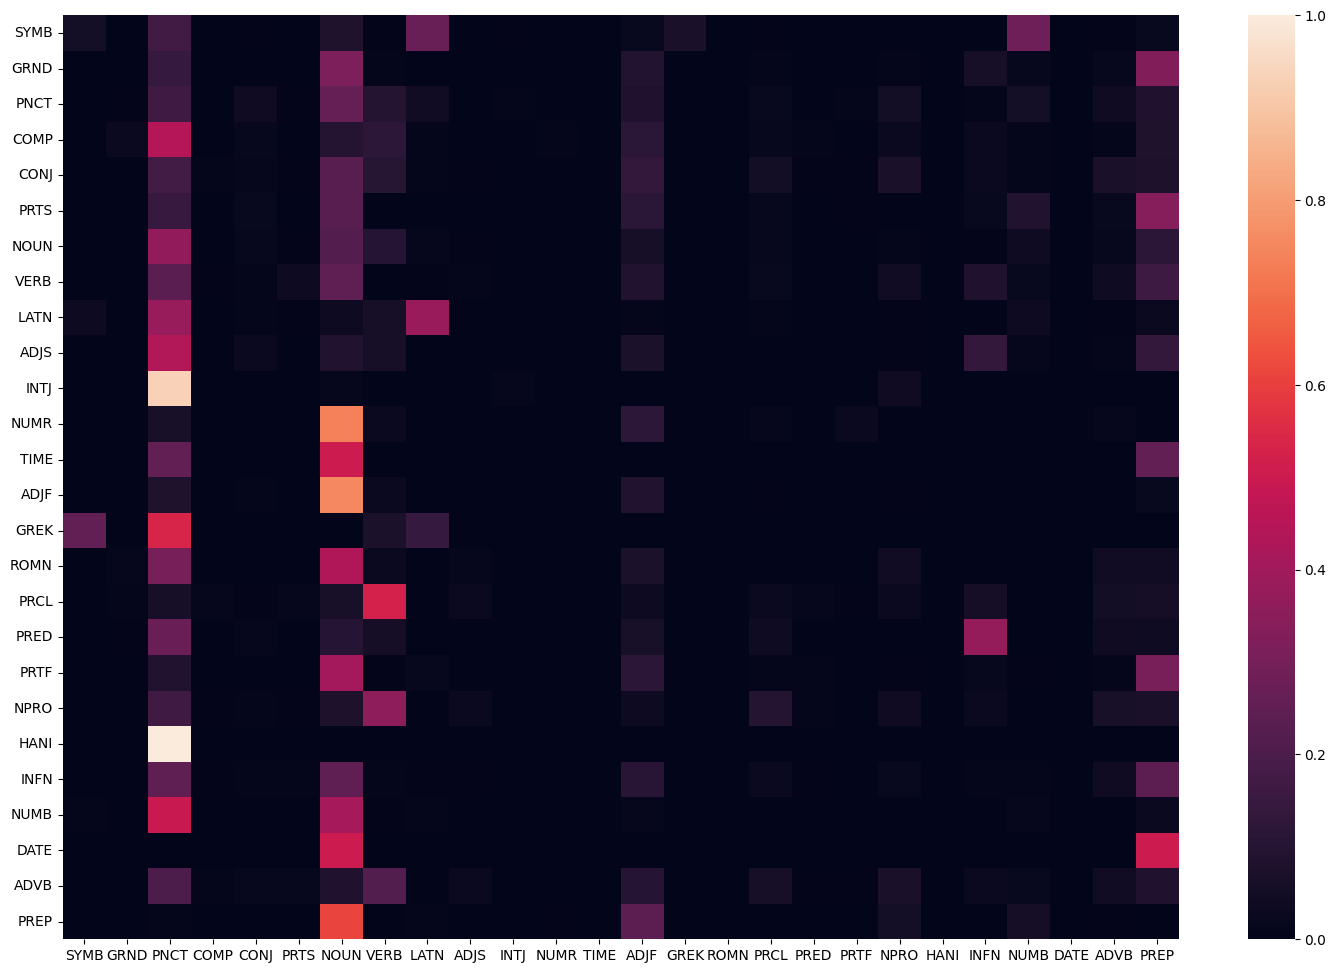

In [ ]:
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

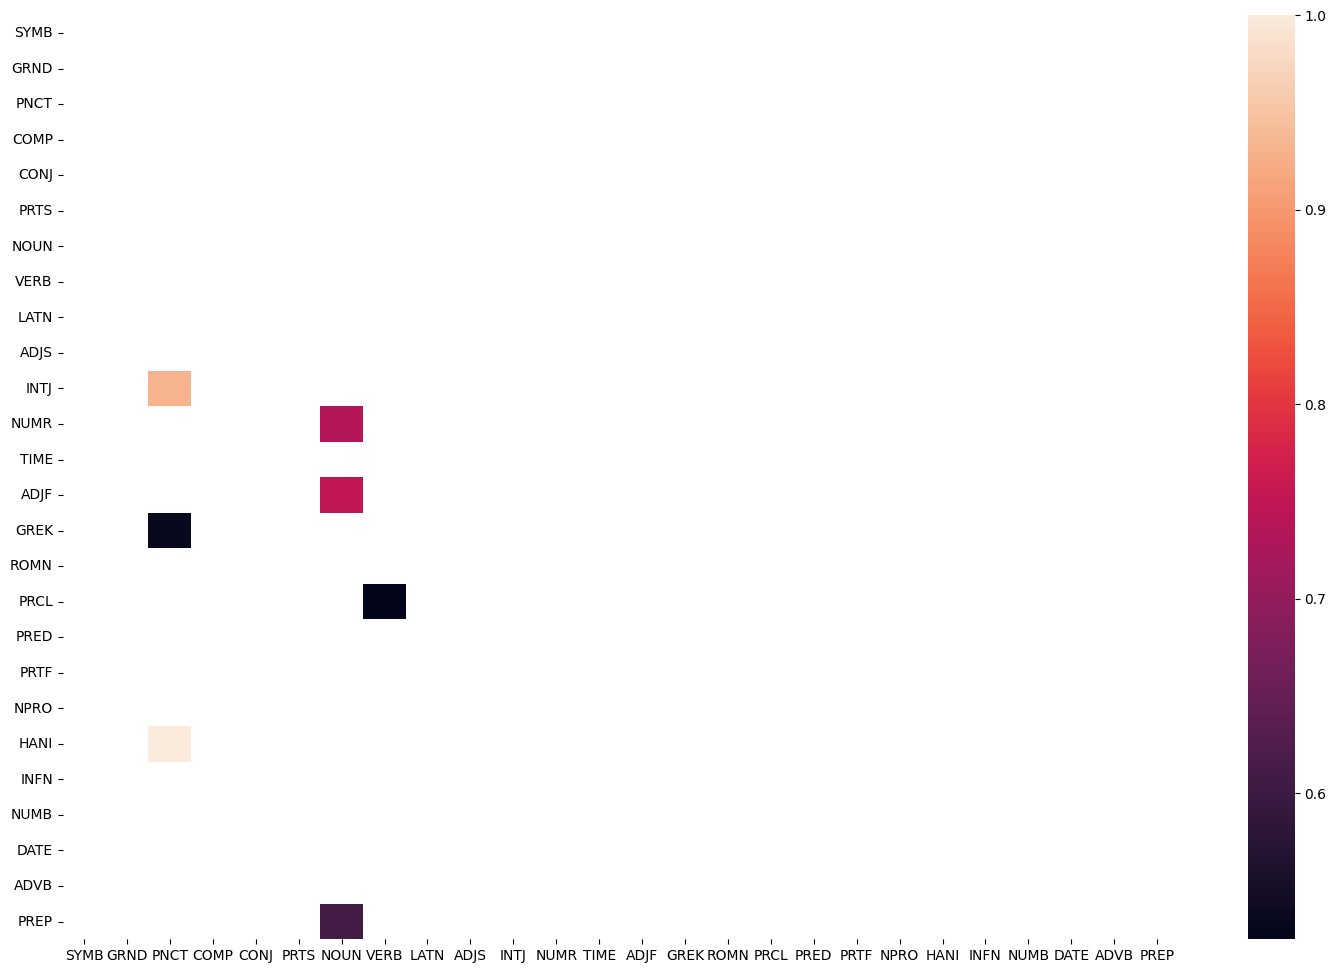

In [ ]:
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

P(tag|start) = P(tag|'.')

In [ ]:
len(train_tagged_words)

53751

In [ ]:
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))

    for key, word in enumerate(words):

        p = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc[:, tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]


            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p
            p.append(state_probability)
        p = sum([j.tolist() for j in p][0])
        pmax = max(p)

        state_max = T[p.index(pmax)]
        state.append(state_max)
    return list(zip(words, state))

In [ ]:
random.seed(1234)

rndom = [random.randint(1,len(test_set)) for x in range(5)]

test_run = [test_set[i] for i in rndom]

test_run_base = [tup for sent in test_run for tup in sent]

test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('Вот', 'PRCL'),
  ('здесь', 'ADVB'),
  (',', 'PNCT'),
  ('в', 'PREP'),
  ('этом', 'ADJF'),
  ('самооправдании', 'NOUN'),
  (',', 'PNCT'),
  ('—', 'PNCT'),
  ('корни', 'NOUN'),
  ('невероятной', 'ADJF'),
  ('долговечности', 'NOUN'),
  ('трифоновской', 'ADJF'),
  ('прозы', 'NOUN'),
  ('.', 'PNCT')],
 [('XII', 'ROMN')],
 [('Не', 'PRCL'), ('можешь', 'VERB'), ('!', 'PNCT')],
 [('Литература', 'NOUN')],
 [('Речь', 'NOUN'),
  ('идёт', 'VERB'),
  ('об', 'PREP'),
  ('антимонопольном', 'ADJF'),
  ('законодательстве', 'NOUN'),
  ('.', 'PNCT')]]

In [ ]:
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

0.0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


ValueError: ignored

In [ ]:
print("Time taken in seconds: ", difference)
print(tagged_seq)
print(test_run_base)

In [ ]:
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j]

In [ ]:
accuracy = len(check)/len(tagged_seq)

In [ ]:
accuracy

0.8867924528301887

In [ ]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

In [ ]:
incorrect_tagged_cases

[[('Peter', 'NNP'), (('Walters', 'VB'), ('Walters', 'NNP'))],
 [(',', ','), (('58-year-old', 'VB'), ('58-year-old', 'JJ'))],
 [('of', 'IN'), (('British', 'JJ'), ('British', 'NNP'))],
 [('this', 'DT'), (('cement', 'VB'), ('cement', 'NN'))],
 [('The', 'DT'), (('Sacramento-based', 'VB'), ('Sacramento-based', 'JJ'))],
 [('which', 'WDT'), (('*T*-110', 'VB'), ('*T*-110', '-NONE-'))],
 [('*T*-110', '-NONE-'), (('has', 'VB'), ('has', 'VBZ'))],
 [('in', 'IN'), (('north', 'VB'), ('north', 'JJ'))],
 [('the', 'DT'), (('purchasing', 'NN'), ('purchasing', 'VBG'))],
 [('being', 'VBG'), (('examined', 'VBD'), ('examined', 'VBN'))],
 [('Robert', 'NNP'), (('Black', 'VB'), ('Black', 'NNP'))],
 [('the', 'DT'), (('Richmond', 'VB'), ('Richmond', 'NNP'))]]

In [ ]:
import nltk
nltk.download('punkt')

sentence_test = 'Я пошел гулять. Прогулка была хорошей. Я увидел лису и зайца.'
words = word_tokenize(sentence_test)

start = time.time()
tagged_seq = Viterbi(words)
end = time.time()
difference = end-start

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print(tagged_seq)
print(difference)

[('Twitter', 'VB'), ('is', 'VB'), ('the', 'DT'), ('best', 'JJS'), ('networking', 'NN'), ('social', 'JJ'), ('site', 'VB'), ('.', '.'), ('Man', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('social', 'JJ'), ('animal', 'VB'), ('.', '.'), ('Data', 'NNP'), ('science', 'NN'), ('is', 'VBZ'), ('an', 'DT'), ('emerging', 'VB'), ('field', 'NN'), ('.', '.'), ('Data', 'NNP'), ('science', 'NN'), ('jobs', 'NNS'), ('are', 'VBP'), ('high', 'JJ'), ('in', 'IN'), ('demand', 'NN'), ('.', '.')]
22.862608909606934
